In [1]:
# Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Preprocessing
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Logistic Regression
from sklearn.linear_model import LogisticRegression

# Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
#from sklearn.metrics import roc_auc_score

# Random Forest
from sklearn.ensemble import RandomForestClassifier

# Gradient Boosted Tree
#from xgboost import XGBClassifier -> Resolve this

In [2]:
train = pd.read_csv(r'C:\Users\Divyanshi\OneDrive\Documents\code basics\application_train.csv')
#df = pd.read_csv(r'C:\Users\Divyanshi\OneDrive\Documents\code basics\application_test.csv')

print(train.shape)
train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [3]:
num_feats = ['CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'HOUR_APPR_PROCESS_START']

cat_feats = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'NAME_INCOME_TYPE',
             'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE',
             'FLAG_DOCUMENT_3','FLAG_DOCUMENT_6','REG_CITY_NOT_LIVE_CITY', 'REG_CITY_NOT_WORK_CITY', 
             'LIVE_CITY_NOT_WORK_CITY','REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']

features = num_feats + cat_feats

In [4]:
print(len(num_feats))
print(len(cat_feats))
print(len(features))

5
15
20


In [5]:
num_transformer = Pipeline (
    steps = [
        ('imputer', SimpleImputer(strategy = 'mean')),
        ('scaler', StandardScaler())
    ]
)

cat_transformer = Pipeline (
    steps = [
        ('imputer', SimpleImputer(strategy = 'constant', fill_value = 'Missing')),
        ('onehot', OneHotEncoder(handle_unknown = 'ignore'))
    ]
)        
        

preprocessor = ColumnTransformer(
    transformers = [
        ('num', num_transformer, num_feats),
        ('cat', cat_transformer, cat_feats)
    ]
)

In [6]:
preprocessor.fit(train[features])
# preprocessor.fit(df[features])

X = preprocessor.transform(train[features])
y = train['TARGET']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#X_train = preprocessor.transform(train[features])
#X_test = preprocessor.transform(df[features])

#y_train = train['TARGET']


print(f' Shape of X_train: {X_train.shape}','\n',
      f'Shape of y_train: {y_train.shape}')

print(f' Shape of X_test: {X_test.shape}','\n',
      f'Shape of y_test: {y_test.shape}')


 Shape of X_train: (246008, 55) 
 Shape of y_train: (246008,)
 Shape of X_test: (61503, 55) 
 Shape of y_test: (61503,)


In [7]:
%%time

dt_clf = DecisionTreeClassifier(random_state=1)

dt_parameters = {
    'max_depth': [15,16,17],
    'min_samples_leaf': [256,512,1024]
}

dt_grid = GridSearchCV(dt_clf, dt_parameters, cv=2, refit='True', n_jobs=-1, verbose=0, scoring= 'roc_auc')
dt_grid.fit(X_train, y_train)

dt_model = dt_grid.best_estimator_

print('Best Parameters:', dt_grid.best_params_)
print('Best CV Score:  ', dt_grid.best_score_)
print('Training Acc:   ', dt_model.score(X_train, y_train))

Best Parameters: {'max_depth': 15, 'min_samples_leaf': 1024}
Best CV Score:   0.6366745384330883
Training Acc:    0.919453838899548
Wall time: 22.7 s


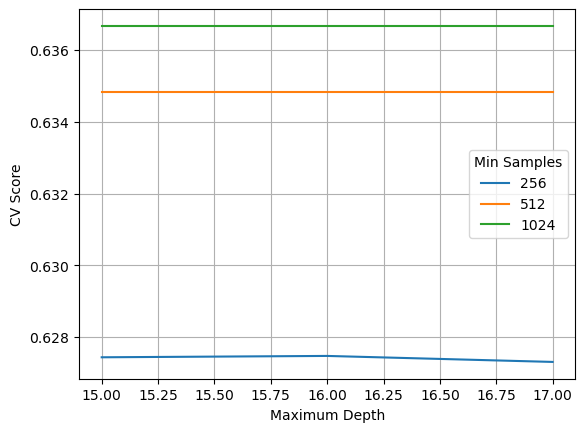

 max_depth  min_samples_leaf  cv_score
        15               256  0.627438
        15               512  0.634820
        15              1024  0.636675
        16               256  0.627476
        16               512  0.634820
        16              1024  0.636675
        17               256  0.627309
        17               512  0.634820
        17              1024  0.636675


In [8]:
dt_summary = pd.DataFrame(dt_grid.cv_results_['params'])
dt_summary['cv_score'] = dt_grid.cv_results_['mean_test_score']

for ms in dt_parameters['min_samples_leaf']:
    temp = dt_summary.query(f'min_samples_leaf == {ms}')
    plt.plot(temp.max_depth, temp.cv_score, label=ms)
plt.xlabel('Maximum Depth')
plt.ylabel('CV Score')
plt.legend(title='Min Samples')
plt.grid()
plt.show()

print(dt_summary.to_string(index=False))

In [9]:

# Define the hyperparameter ranges
float_param_ranges = {}
int_param_candidates = {
    'max_depth': list(np.arange(11,21)),
    # 'min_samples_split': [2, 4, 6, 8, 10]#,
    'min_samples_leaf': list(np.arange(1010,1030))
}

# Initialize and run the Bayesian optimizer

optimizer = BayesianOptimizer(
    func=objective_function,
    float_param_ranges=float_param_ranges,
    int_param_candidates=int_param_candidates,
    n_init_points=5,
    max_iter=2000,
    model_class= DecisionTreeClassifier
    # kernel=RBF(length_scale=1.0)
)
optimizer.optimize()
hyper_setting = optimizer.get_results()

print(hyper_setting)

best_score = -hyper_setting.iloc[0]['AvgTestCost']
best_params = hyper_setting.iloc[0][:-2].to_dict()
print('Best_score: ', best_score )
print('Best Params: ', best_params)

NameError: name 'BayesianOptimizer' is not defined

In [ ]:
param_distributions = {'max_depth':list(np.arange(11,21)),
'min_samples_leaf':list(np.arange(1010,1030))}

optimize_random_search(DecisionTreeClassifier(),param_distributions, X_train, y_train)

{'min_samples_leaf': 1020, 'max_depth': 12}

In [ ]:
model_using_bayesian = DecisionTreeClassifier(max_depth = int(best_params['max_depth']), min_samples_leaf = int(best_params['min_samples_leaf']))


ImportError: cannot import name 'fmin' from 'hyperopt' (c:\Users\Divyanshi\OneDrive\Documents\code basics\hyperopt.py)